In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 



In [3]:
df = pd.read_csv('UK_foods.csv',index_col='Unnamed: 0')

In [5]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [6]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### Created a heatmap from df, to check if any country stands out 

<Axes: >

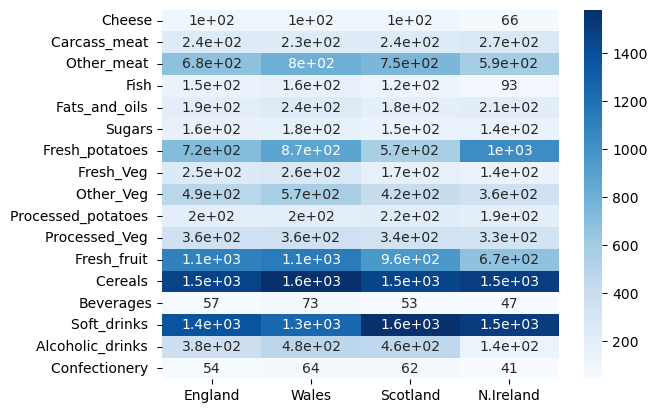

In [10]:
sns.heatmap(data = df,cmap="Blues",annot=True)

In [74]:
#It is hard to notice any significant diffrence between the countries and there eating habbits
# Using autoencodr to reduce the dimentions

### Autoencoder

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
df.shape

(17, 4)

In [56]:
encoder = Sequential()
encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

C:\Users\sudhi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [16]:
autoencoder = Sequential([encoder,decoder])

In [47]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=2.0))

In [59]:
df= df.T

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
mms = MinMaxScaler()

In [62]:
df_scaled = mms.fit_transform(df.values)

In [63]:
df_scaled

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [65]:
autoencoder.fit(df_scaled,df_scaled,epochs=15)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.2310
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2289
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2284
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2342
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2825
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2593
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3495
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3055
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2720
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2452
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2392
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2394
Epoch 13/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2461
Epoch 14/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2918
Epoch 15/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2382


In [67]:
encoded_2dim=encoder.predict(df_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [68]:
df.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [69]:
results = pd.DataFrame(data=encoded_2dim,index=df.index,
                      columns=['C1','C2'])

In [70]:
results

,C1,C2
England,0.181963,0.0
Wales,0.211262,0.0
Scotland,0.227219,0.0
N.Ireland,0.133220,0.0


<Axes: xlabel='C1', ylabel='C2'>

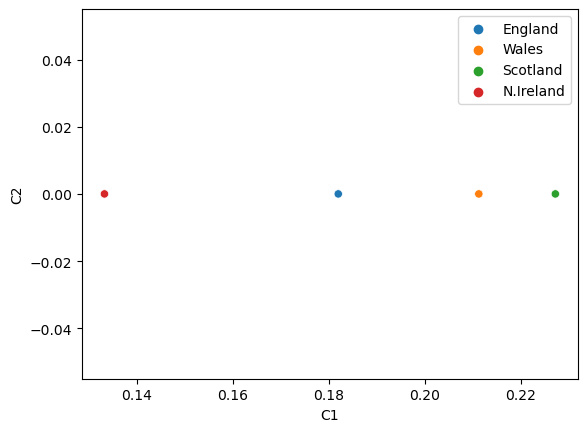

In [72]:
sns.scatterplot(x='C1',y='C2',data=results,hue=results.index)

#### the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.